Dependencies

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Graphing the potential curve

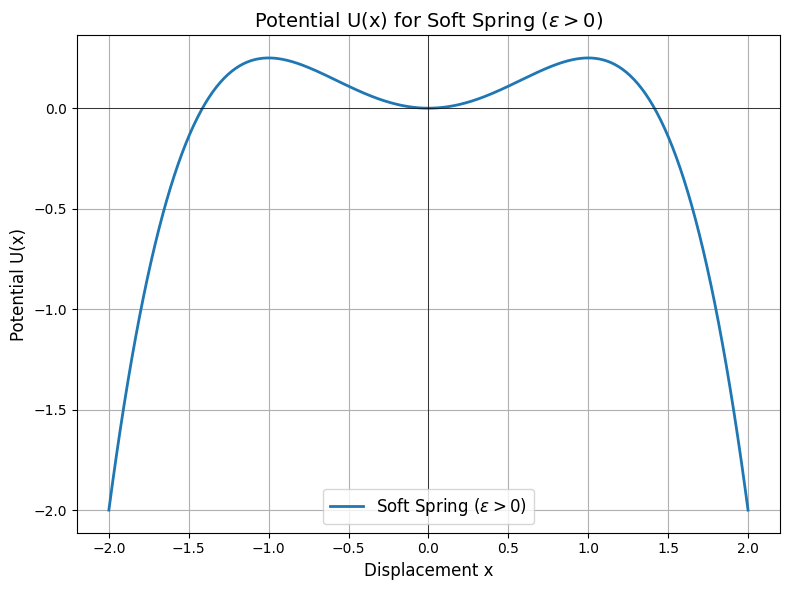

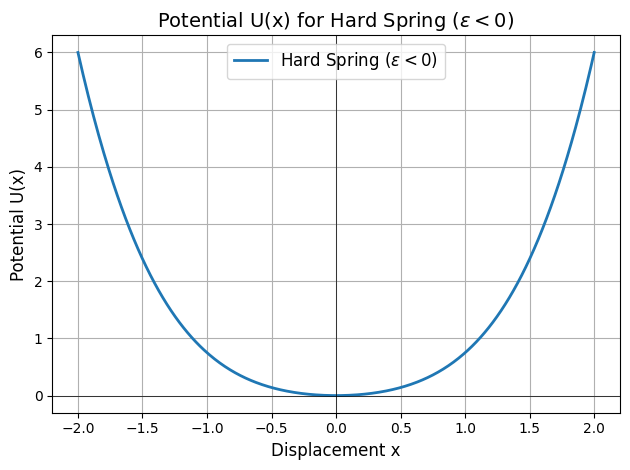

In [2]:

# Parameters
epsilon_values = [-1.0, 1.0]  # epsilon > 0 (hard spring), epsilon < 0 (soft spring)

# Define a range for x
x = np.linspace(-2, 2, 500)

# Initialize the plot
plt.figure(figsize=(8, 6))

for epsilon in epsilon_values:
    U = (0.5 * np.pow(x,2)) + (0.25 * epsilon * np.pow(x,4))
    
    spring_type = 'Hard Spring ($\\epsilon < 0$)' if epsilon > 0 else 'Soft Spring ($\\epsilon > 0$)'
    
    plt.plot(x, U, label=spring_type, linewidth=2)
    
    plt.title(f'Potential U(x) for {spring_type}', fontsize=14)
    plt.xlabel('Displacement x', fontsize=12)
    plt.ylabel('Potential U(x)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5)  
    plt.tight_layout()
    plt.show()




Graphing x(t) vs t (UNDAMPED and UNFORCED CASE)

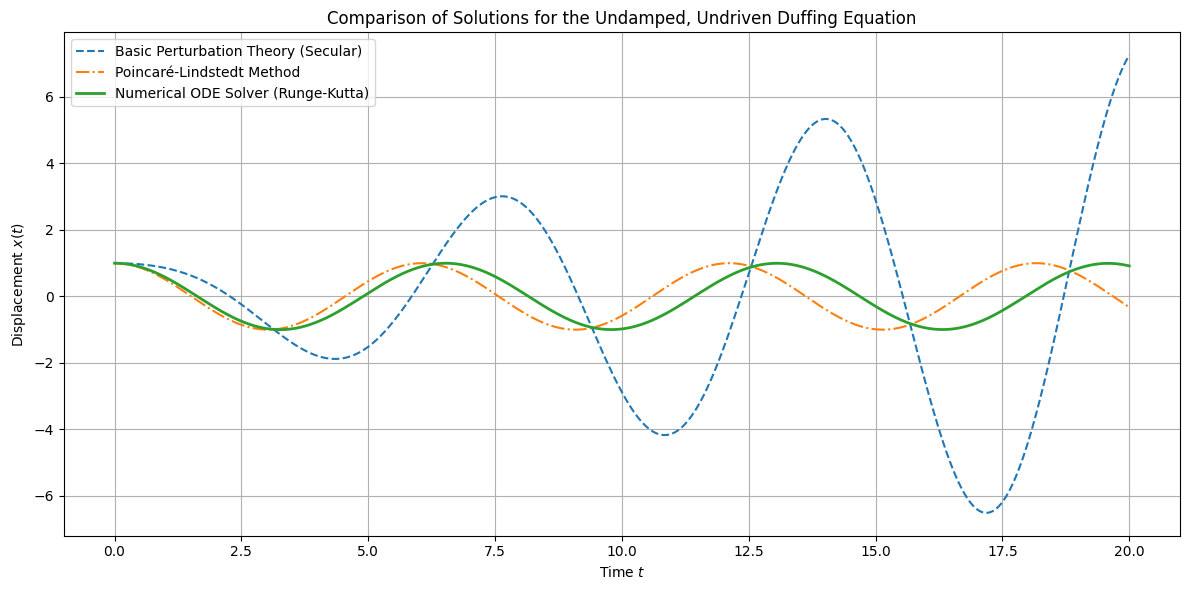

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
k = 1.0          
epsilon = 0.1    
A = 1.0         
omega = np.sqrt(k)

# Time span for the solution
t_start = 0
t_end = 20
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Basic Perturbation Theory Solution
def basic_perturbation(t, A, omega, epsilon):
    """
    Basic perturbation theory solution up to O(epsilon).
    Includes secular term: x(t) = A cos(omega t) + (3 A^3 / (8 omega)) t sin(omega t)
    """
    return A * np.cos(omega * t) + (3 * A**3 / (8 * omega)) * t * np.sin(omega * t)

# Poincare-Lindstedt Method Solution
def poincare_lindstedt(t, A, omega, epsilon):
    """
    Poincare-Lindstedt solution up to O(epsilon).
    Adjusts frequency to remove secular terms: x(t) ≈ A cos((omega + (3 A^2 / (8)) epsilon) t)
    """
    Omega_1 = (3 * A**2) / 8
    Omega = omega + epsilon * Omega_1
    return A * np.cos(Omega * t)

# Numerical Solution via ODE Solver
def duffing_ode(t, y, k, epsilon):
    """
    Defines the ODE system for the undamped, undriven Duffing equation.
    y[0] = x
    y[1] = dx/dt = v
    """
    x, v = y
    dxdt = v
    dvdt = -k * x + epsilon * x**3
    return [dxdt, dvdt]

# My IC's
y0 = [A, 0.0]  # x(0) = A, v(0) = 0

# Solve numerically using solve_ivp with Runge-Kutta method
sol = solve_ivp(duffing_ode, [t_start, t_end], y0, args=(k, epsilon), t_eval=t_eval, method='RK45')

x_num = sol.y[0]

x_basic = basic_perturbation(t_eval, A, omega, epsilon)
x_pl = poincare_lindstedt(t_eval, A, omega, epsilon)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t_eval, x_basic, label='Basic Perturbation Theory (Secular)', linestyle='--')
plt.plot(t_eval, x_pl, label='Poincaré-Lindstedt Method', linestyle='-.')
plt.plot(t_eval, x_num, label='Numerical ODE Solver (Runge-Kutta)', linewidth=2)
plt.xlabel('Time $t$')
plt.ylabel('Displacement $x(t)$')
plt.title('Comparison of Solutions for the Undamped, Undriven Duffing Equation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


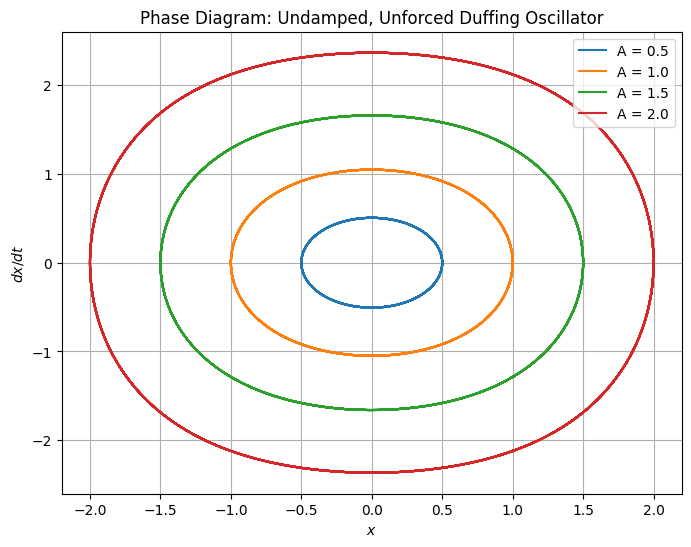

In [4]:
k = 1.0 # To keep it simple
epsilon = 0.2 #A sample value I just came up with by testing different values
t_span = (0, 50) 
t_eval = np.linspace(t_span[0], t_span[1], 2000)
initial_amps = [0.5, 1.0, 1.5, 2.0] 

# Define the Duffing oscillator ODE
def PHASEPLOT_duffing_ode(t, y, k, epsilon):
    x, x_dot = y
    dxdt = x_dot
    dx_dotdt = -(k * x) - (epsilon * x**3)
    return [dxdt, dx_dotdt]

plt.figure(figsize=(8, 6))
for A_init in initial_amps:
    sol = solve_ivp(PHASEPLOT_duffing_ode, t_span, [A_init, 0.0], args=(k, epsilon), t_eval=t_eval, method='RK45', rtol=1e-10, atol=1e-10)
    plt.plot(sol.y[0], sol.y[1], label=f'A = {A_init}')

plt.xlabel('$x$')
plt.ylabel(r'$dx/dt$')
plt.title('Phase Diagram: Undamped, Unforced Duffing Oscillator')
plt.legend()
plt.grid(True)
plt.show()


### Section 4

Chaos

In [7]:
# This time full DUFFING ODE (i.e. with dampening and driver)
def duffing_ode(t, y, delta, alpha, beta, gamma, omega):
    x, v = y
    dxdt = v
    dvdt = -delta * v - alpha * x - beta * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

def solve_and_plot_duffing():
    # Constants
    delta = 0.1      # Damping coefficient
    alpha = -1       # Linear stiffness coefficient
    beta = 1         # Nonlinear stiffness coefficient
    omega = 1.4      # Angular frequency of the driving force
    y0 = [0, 0]      # Initial conditions: x(0) = 0, v(0) = 0
    dt = 0.1         # Time step size

    # As shown on my table
    gamma_cases = [
        {
            "gamma": 0.1,
            "t_start": 0,
            "t_end": 200,
            "plots": [
                {"range": [0, 200], "filename": "gamma_0.1_full_time.png"},
                {"range": [150, 200], "filename": "gamma_0.1_zoom_time.png"}
            ]
        },
        {
            "gamma": 0.318,
            "t_start": 0,
            "t_end": 800,
            "plots": [
                {"range": [0, 200], "filename": "gamma_0.318_full_time.png"},
                {"range": [789.85, 799], "filename": "gamma_0.318_zoom_time.png"}
            ]
        },
        {
            "gamma": 0.338,
            "t_start": 0,
            "t_end": 2000,
            "plots": [
                {"range": [0, 200], "filename": "gamma_0.338_full_time.png"},
                {"range": [1981.97, 2000], "filename": "gamma_0.338_zoom_time.png"}
            ]
        },
        {
            "gamma": 0.35,
            "t_start": 0,
            "t_end": 3000,
            "plots": [
                {"range": [0, 300], "filename": "gamma_0.35_full_time.png"},
                {"range": [2959.85, 3000], "filename": "gamma_0.35_subplot1_time.png"},
                {"range": [2989.85, 3000], "filename": "gamma_0.35_subplot2_time.png"}
            ]
        }
    ]

    save_dir = "Duffing_Plots"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for case in gamma_cases:
        gamma = case["gamma"]
        t_start = case["t_start"]
        t_end = case["t_end"]
        plot_info = case["plots"]

        t_eval = np.arange(t_start, t_end + dt, dt)

        #Using same ODE Solver as before
        sol = solve_ivp(
            duffing_ode,
            [t_start, t_end],
            y0,
            args=(delta, alpha, beta, gamma, omega),
            t_eval=t_eval,
            method='RK45'
        )

        # Check if the solver was successful
        if not sol.success:
            print(f"ODE solver failed for gamma = {gamma}")
            continue

        # Extract solution 
        t = sol.t
        x = sol.y[0]
        v = sol.y[1]

        # Iterate over each plot range for the current gamma
        for plot in plot_info:
            t_min, t_max = plot["range"]
            filename = plot["filename"]

            # Indices for time series plots
            indices_time = np.where((t >= t_min) & (t <= t_max))
            t_plot = t[indices_time]
            x_plot = x[indices_time]
            v_plot = v[indices_time]

            # Time Series Plot
            plt.figure(figsize=(10, 6))
            plt.plot(t_plot, x_plot, label='Displacement (x)')
            plt.plot(t_plot, v_plot, label='Velocity (v)')
            plt.title(f'Duffing Oscillator Time Series for γ = {gamma}\nTime Interval: [{t_min}, {t_max}]')
            plt.xlabel('Time (t)')
            plt.ylabel('Solutions')
            plt.legend()
            plt.grid(True)
            save_path = os.path.join(save_dir, filename)
            plt.savefig(save_path)
            plt.close()
            print(f"Saved time series plot: {save_path}")

        # Special handling for gamma = 0.35 to create the subplots
        if gamma == 0.35:
            # Define the subplot ranges
            subplot_info = [
                {
                    "range": [2959.85, 3000],
                    "filename": "gamma_0.35_subplots_time.png"
                },
                {
                    "range": [2989.85, 3000],
                    "filename": "gamma_0.35_subplots2_time.png"
                }
            ]

            for subplot in subplot_info:
                t_min, t_max = subplot["range"]
                filename = subplot["filename"]

                # Time Series Plot for Subplot
                indices_time = np.where((t >= t_min) & (t <= t_max))
                t_sub = t[indices_time]
                x_sub = x[indices_time]
                v_sub = v[indices_time]

                plt.figure(figsize=(10, 6))
                plt.plot(t_sub, x_sub, label='Displacement (x)')
                plt.plot(t_sub, v_sub, label='Velocity (v)')
                plt.title(f'Duffing Oscillator Time Series for γ = {gamma}\nTime Interval: [{t_min}, {t_max}]')
                plt.xlabel('Time (t)')
                plt.ylabel('Solutions')
                plt.legend()
                plt.grid(True)
                save_path = os.path.join(save_dir, filename)
                plt.savefig(save_path)
                plt.close()
                print(f"Saved subplot time series plot: {save_path}")

if __name__ == "__main__":
    solve_and_plot_duffing()


Saved time series plot: Duffing_Plots/gamma_0.1_full_time.png
Saved time series plot: Duffing_Plots/gamma_0.1_zoom_time.png
Saved time series plot: Duffing_Plots/gamma_0.318_full_time.png
Saved time series plot: Duffing_Plots/gamma_0.318_zoom_time.png
Saved time series plot: Duffing_Plots/gamma_0.338_full_time.png
Saved time series plot: Duffing_Plots/gamma_0.338_zoom_time.png
Saved time series plot: Duffing_Plots/gamma_0.35_full_time.png
Saved time series plot: Duffing_Plots/gamma_0.35_subplot1_time.png
Saved time series plot: Duffing_Plots/gamma_0.35_subplot2_time.png
Saved subplot time series plot: Duffing_Plots/gamma_0.35_subplots_time.png
Saved subplot time series plot: Duffing_Plots/gamma_0.35_subplots2_time.png
